In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import mutual_info_regression, mutual_info_classif

In [90]:
#read dataset
data = pd.read_csv("/content/drive/MyDrive/CIND 820 Capstone Project/merged_completedata.csv")

In [91]:
# filter dataframe
data = data[data['Year'] >= 2019] 

In [92]:
data.head()

,RecordID,X,Y,FID,BusinessID,Name,Address,StreetNo,StreetName,BldgNo,...,Fax,TollFree,EMail,WebAddress,EmplRange,CENT_X,CENT_Y,Year,isnew,Closed
46689,46690,-79.665386,43.684736,1,7,Peel Car & Truck Rentals,7050 Bramalea Rd,7050,Bramalea Rd,Yes,...,905-670-6458,Yes,peelcarrentals@gmail.com,Yes,1,607567.2334,4.837723e+06,2019,No,No
46690,46691,-79.642760,43.593515,2,4246,Real Fruit Bubble Tea,100 City Centre Dr,100,City Centre Dr,No,...,,No,,Yes,2,609556.5032,4.827621e+06,2019,Yes,No
46691,46692,-79.667311,43.682752,3,10,Unifor 2002,7015 Tranmere Dr,7015,Tranmere Dr,No,...,905-678-0100,Yes,info@unifor2002.org,Yes,3,607415.6044,4.837500e+06,2019,No,No
46692,46693,-79.629235,43.698932,4,4247,Laura with Plus and Petites,100 City Centre Dr,100,City Centre Dr,No,...,,No,,Yes,2,610454.8654,4.839347e+06,2019,Yes,No
46693,46694,-79.629235,43.698932,5,4250,Footlocker,100 City Centre Dr,100,City Centre Dr,No,...,,No,,No,4,610454.8654,4.839347e+06,2019,Yes,No


In [93]:
df2 = pd.DataFrame().assign(Year=data['Year'], Size=data['EmplRange'], Industry=data['NAICSCat'])
print(df2)

       Year  Size                                           Industry
46689  2019     1                                       Retail Trade
46690  2019     2                    Accommodation and Food Services
46691  2019     3                                     Other Services
46692  2019     2                                       Retail Trade
46693  2019     4                                       Retail Trade
...     ...   ...                                                ...
78027  2021     3  Administrative and Support, Waste Management a...
78028  2021     1  Administrative and Support, Waste Management a...
78029  2021     1                    Accommodation and Food Services
78030  2021     1                                    Wholesale Trade
78031  2021     1                                    Wholesale Trade

[31343 rows x 3 columns]


In [94]:
dfIndustryCount = df2.groupby(['Year','Industry'])['Year'].count()
dfIndustryCount

Year  Industry                                                             
2019  Accommodation and Food Services                                          1321
      Administrative and Support, Waste Management and Remediation Services     562
      Arts, Entertainment and Recreation                                        228
      Construction                                                              621
      Educational Services                                                      647
      Finance and Insurance                                                     638
      Health Care and Social Assistance                                        1281
      Information and Cultural Industries                                       137
      Management of Companies and Enterprises                                   107
      Manufacturing                                                            2071
      Other Services                                                           1873


In [95]:
dfIndustryCount = df2.groupby(['Industry','Year'])['Industry'].count()
dfIndustryCount

Industry                                                               Year
Accommodation and Food Services                                        2019    1321
                                                                       2021    1230
Administrative and Support, Waste Management and Remediation Services  2019     562
                                                                       2021     494
Arts, Entertainment and Recreation                                     2019     228
                                                                       2021     202
Construction                                                           2019     621
                                                                       2021     548
Educational Services                                                   2019     647
                                                                       2021     587
Finance and Insurance                                                  2019     638


In [97]:
dfSizeCount = df2.groupby(['Year','Size'])['Year'].count()
dfSizeCount

Year  Size
2019  1       7629
      2       3470
      3       2316
      4       1767
      5        729
      6        478
      7         75
      8         34
      9         20
2021  1       6712
      2       3139
      3       2084
      4       1601
      5        714
      6        441
      7         76
      8         34
      9         24
Name: Year, dtype: int64

In [98]:
dfSizeCount = df2.groupby(['Size','Year'])['Size'].count()
dfSizeCount

Size  Year
1     2019    7629
      2021    6712
2     2019    3470
      2021    3139
3     2019    2316
      2021    2084
4     2019    1767
      2021    1601
5     2019     729
      2021     714
6     2019     478
      2021     441
7     2019      75
      2021      76
8     2019      34
      2021      34
9     2019      20
      2021      24
Name: Size, dtype: int64

<AxesSubplot:xlabel='Industry'>

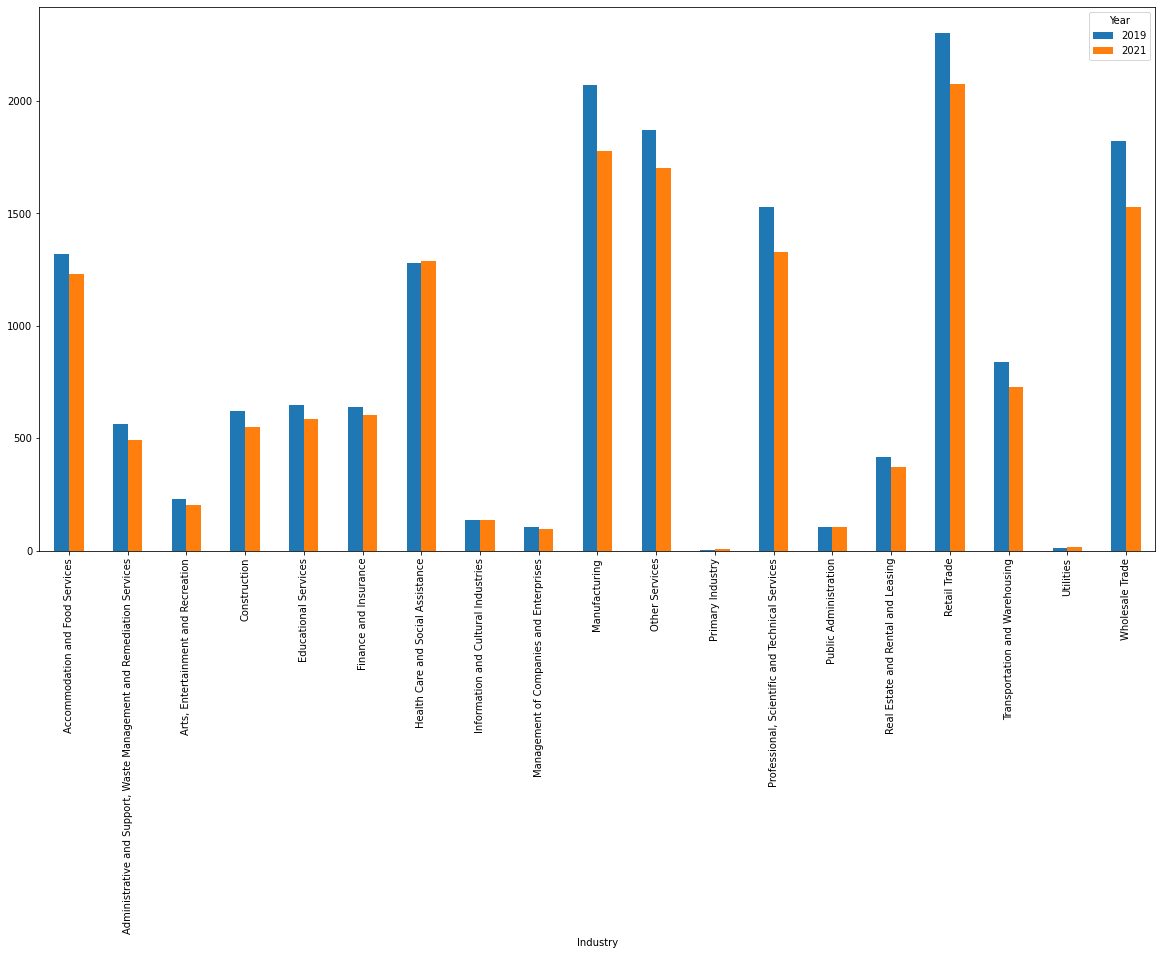

In [99]:
(df2.groupby(['Year','Industry'])['Year']
    .count().unstack('Year').plot.bar(figsize=(20, 10)))
#Net loss of businesses by Industry between 2019 and 2021
#Industries where most businesses closed were : Wholesale Trade ; Manufacturing ; Retail Trade
#Some of these industries fall within the industries other studies pointed to as experiencing and existential threat early in the pandemic and vice versa least negatively impacted
#example: Retail Trade vs Public Administration
#Industries where least businesss closed were :  Information and Cultural Industries ; Public Administration
#Industries Health Care and Social Assistance ;  Utlities - Were the only industries to increase business count
#Some of these fall within the strategic industries Mississauga has identified for future growth
#So to summarize, there is both agreement and disagreement from the other studies. Keeping in mind some industries are not in cities eg. Mining or Fishing.

<AxesSubplot:xlabel='Size'>

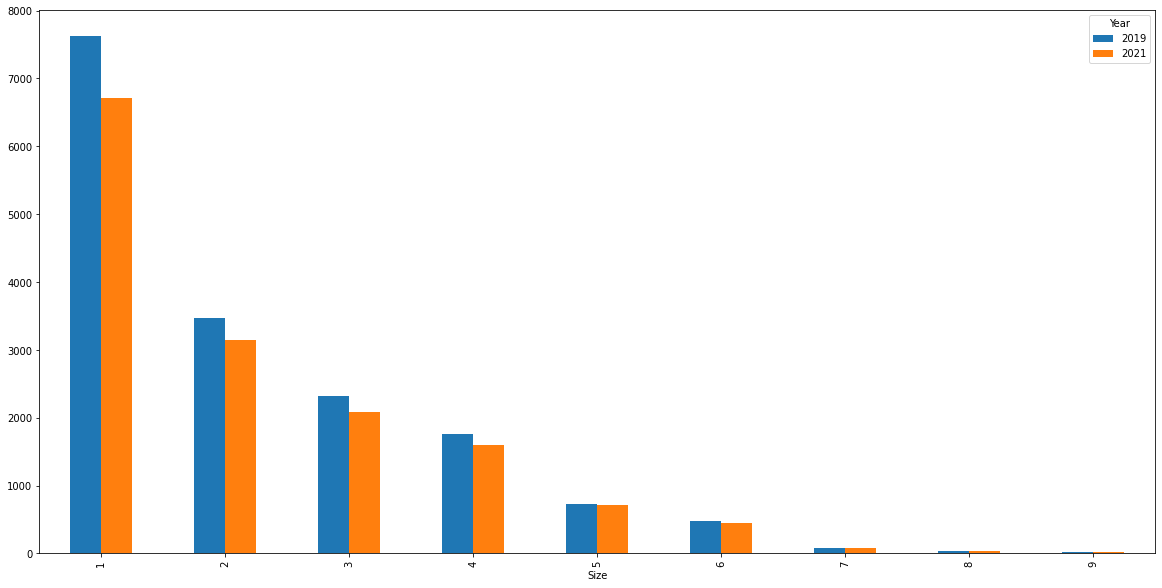

In [100]:
(df2.groupby(['Year','Size'])['Year']
    .count().unstack('Year').plot.bar(figsize=(20, 10)))
#Net loss of businesses by Size of business between 2019 and 2021
#The smallest businesses closed the most between 2019 and 2021 - '1 to 4': 1, '5 to 9': 2, '10 to 19': 3
#The largest businesses stayed even ['500 to 999': 8]  or even grew ['300 to 499': 7, '1000+': 9 ]
#The larger the business the more stable
#This is different from Stats Can ontario survey were 20-99, 5-19 adn 100-249 were hardest hit and 0, 1-4 and 250-499 were least affected
#I need to factor in the age of the business. Were businesses that were older less likely to close?

